In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"D:\Projects\ML projects\Visa Approval\data\Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [4]:
df.shape

(25480, 12)

In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [7]:
numeric_features = df.select_dtypes(exclude="object").columns
categoric_features = df.select_dtypes(include="object").columns

print(f"Numeric Columns {len(numeric_features)}: {numeric_features}")
print(f"Categoric Columns {len(categoric_features)}: {categoric_features}")

Numeric Columns 3: Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')
Categoric Columns 9: Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
df.duplicated().sum()

0

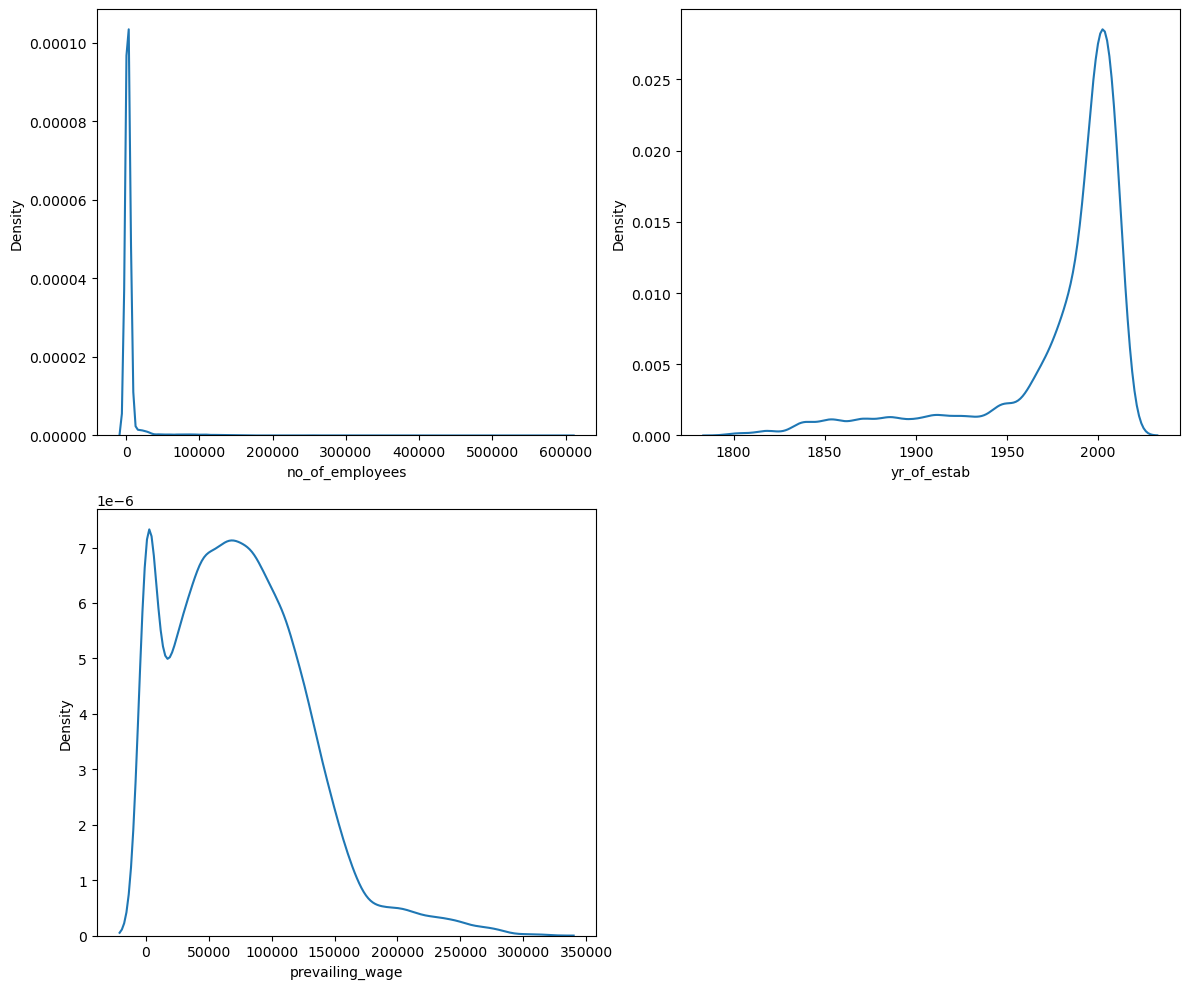

In [10]:
plt.figure(figsize=(12,10))

for i , col in enumerate(numeric_features):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

In [11]:
# plt.figure(figsize=(12,10))

# for i , col in enumerate(categoric_features):
#     plt.subplot(3,3,i+1)
#     sns.countplot(df[col])
#     plt.xlabel(col)
#     plt.tight_layout()
# plt.show()

In [12]:
df = df.drop("case_id",axis=1)


In [13]:
from datetime import date

today = date.today()
current_year = today.year
df['company_age'] = current_year-df["yr_of_estab"]

In [14]:
df = df.drop(columns="yr_of_estab")


In [15]:
numeric_features = df.select_dtypes(exclude="object").columns
categoric_features = df.select_dtypes(include="object").columns

print(f"Numeric Columns {len(numeric_features)}: {numeric_features}")
print(f"Categoric Columns {len(categoric_features)}: {categoric_features}")

Numeric Columns 3: Index(['no_of_employees', 'prevailing_wage', 'company_age'], dtype='object')
Categoric Columns 8: Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [16]:
for col in categoric_features:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
Unique values in education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
Unique values in has_job_experience: ['N' 'Y']
Unique values in requires_job_training: ['N' 'Y']
Unique values in region_of_employment: ['West' 'Northeast' 'South' 'Midwest' 'Island']
Unique values in unit_of_wage: ['Hour' 'Year' 'Week' 'Month']
Unique values in full_time_position: ['Y' 'N']
Unique values in case_status: ['Denied' 'Certified']


In [17]:
from sklearn.preprocessing import  LabelEncoder

encoder = LabelEncoder()
for columns in categoric_features:
    df[columns] = encoder.fit_transform(df[columns])
# Feature Scaling is not performed here,because Tree based models are not sensitive to feature scaling.

In [18]:
x = df.drop(columns="case_status")
y = df["case_status"]

In [19]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state =42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(20384, 10) (5096, 10) (20384,) (5096,)


<Axes: >

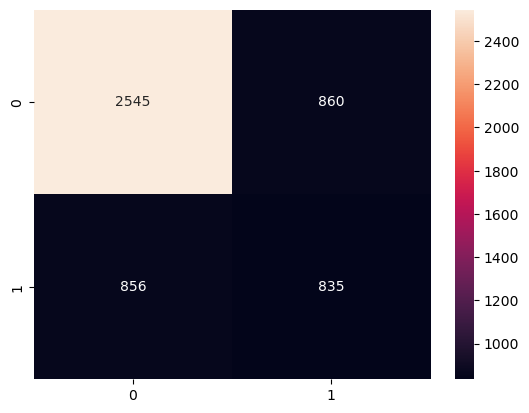

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report

conn = confusion_matrix(y_pred,y_test)
sns.heatmap(conn,annot = True,fmt=".0f")

In [21]:
y_train.value_counts()

case_status
0    13617
1     6767
Name: count, dtype: int64

In [22]:
print("Decison Tree")
print(classification_report(y_pred,y_test))

Decison Tree
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3405
           1       0.49      0.49      0.49      1691

    accuracy                           0.66      5096
   macro avg       0.62      0.62      0.62      5096
weighted avg       0.66      0.66      0.66      5096



In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train) 


smote_dt = DecisionTreeClassifier()
smote_dt.fit(x_train_resampled,y_train_resampled)

y_pred = smote_dt.predict(x_test)
print("Decison Tree after SMOTE")
print(classification_report(y_pred,y_test))

Decison Tree after SMOTE
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      3045
           1       0.56      0.46      0.51      2051

    accuracy                           0.64      5096
   macro avg       0.62      0.61      0.61      5096
weighted avg       0.63      0.64      0.63      5096



In [24]:
weighted_model = DecisionTreeClassifier(class_weight="balanced",random_state=42)
weighted_model.fit(x_train,y_train)
y_pred = weighted_model.predict(x_test)
print("Decison Tree after Weighted Class")
print(classification_report(y_pred,y_test))

Decison Tree after Weighted Class
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      3437
           1       0.49      0.50      0.50      1659

    accuracy                           0.67      5096
   macro avg       0.62      0.62      0.62      5096
weighted avg       0.67      0.67      0.67      5096



In [41]:

smote_weighted_model = DecisionTreeClassifier(class_weight="balanced",random_state=42)
smote_weighted_model.fit(x_train_resampled,y_train_resampled)
y_pred = smote_weighted_model.predict(x_test)
print("Decison Tree after Weighted Class and SMOTE")
print(classification_report(y_pred,y_test))

Decison Tree after Weighted Class and SMOTE
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      3078
           1       0.55      0.46      0.50      2018

    accuracy                           0.64      5096
   macro avg       0.61      0.61      0.61      5096
weighted avg       0.63      0.64      0.63      5096



In [42]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(is_unbalance=True, random_state=42)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)
print("lIght GBM")
print(classification_report(y_pred,y_test))

[LightGBM] [Info] Number of positive: 6767, number of negative: 13617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 20384, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331976 -> initscore=-0.699261
[LightGBM] [Info] Start training from score -0.699261
lIght GBM
              precision    recall  f1-score   support

           0       0.75      0.83      0.78      3078
           1       0.68      0.57      0.62      2018

    accuracy                           0.73      5096
   macro avg       0.72      0.70      0.70      5096
weighted avg       0.72      0.73      0.72      5096



In [ ]:
from sklearn.model_selection import KFold, cross_val_score

num_folds =  5
kf = KFold(n_splits = num_folds,shuffle = True,random_state=42)
cross_val_results = cross_val_score(lgbm, x_train, y_train, cv=kf)
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')


[LightGBM] [Info] Number of positive: 5439, number of negative: 10868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333538 -> initscore=-0.692227
[LightGBM] [Info] Start training from score -0.692227
[LightGBM] [Info] Number of positive: 5416, number of negative: 10891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 10
[LightGBM] [Info] [bin

In [47]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(lgbm, x_train, y_train, cv=skf)
for result in cross_val_results:
    print(f"  Fold {i}: {result * 100:.2f}%")
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

[LightGBM] [Info] Number of positive: 5413, number of negative: 10894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.331943 -> initscore=-0.699409
[LightGBM] [Info] Start training from score -0.699409
[LightGBM] [Info] Number of positive: 5413, number of negative: 10894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 16307, number of used features: 10
[LightGBM] [Info] [bin

In [44]:
smote_lgbm = lgb.LGBMClassifier(is_unbalance=True, random_state=42)
smote_lgbm.fit(x_train_resampled, y_train_resampled)
y_pred = smote_lgbm.predict(x_test)  
print("lIght GBM after SMOTE")
print(classification_report(y_pred,y_test))

[LightGBM] [Info] Number of positive: 13617, number of negative: 13617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 27234, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
lIght GBM after SMOTE
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3443
           1       0.58      0.60      0.59      1653

    accuracy                           0.73      5096
   macro avg       0.69      0.70      0.69      5096
weighted avg       0.73      0.73      0.73      5096



In [48]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    "max_depth":[5,7,10,15],
    "n_estimators":[150,200,170],
    "learning_rate":[2e-4,1e-9]
}

lgbm_random = RandomizedSearchCV(lgbm,param_distributions=param_dist,n_iter=10,cv=3,verbose=1,n_jobs=-1)
lgbm_random.fit(x_train_resampled,y_train_resampled)
print("Best Parameters: ",lgbm_random.best_params_) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 13617, number of negative: 13617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 27234, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters:  {'n_estimators': 170, 'max_depth': 10, 'learning_rate': 0.0002}


<Axes: >

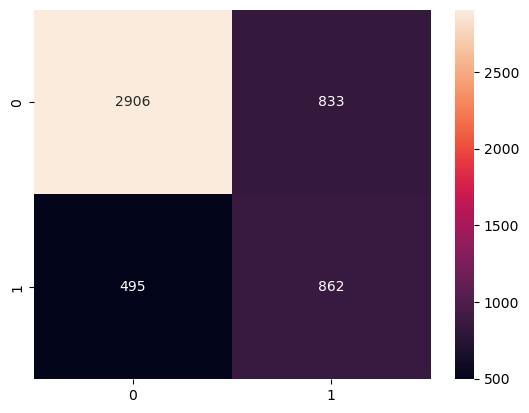

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight="balanced",n_estimators=150,criterion="gini",max_depth=25)   
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

from sklearn.metrics import confusion_matrix

conn = confusion_matrix(y_pred,y_test)
sns.heatmap(conn,annot = True,fmt=".0f")

In [ ]:
print("Random Forest")
print(classification_report(y_pred,y_test))

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3739
           1       0.51      0.64      0.56      1357

    accuracy                           0.74      5096
   macro avg       0.68      0.71      0.69      5096
weighted avg       0.76      0.74      0.75      5096



In [ ]:
import joblib
joblib.dump(lgbm,"../model/LightGBM.pkl")

['../model/LightGBM.pkl']